### Packages

In [1]:
from typing import Any, List, Optional
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Data

In [2]:
df = pd.read_csv("../data/dataset.csv", sep=";")
df.head()

,uuid,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
0,63f69b2c-8b1c-4740-b78d-52ed9a4515ac,0.0,0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,...,1,1,1,1,0,0,0,178839,9.653333,1.0
1,0e961183-8c15-4470-9a5e-07a1bd207661,0.0,0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,...,1,1,2,2,0,0,0,49014,13.181389,NaN
2,d8edaae6-4368-44e0-941e-8328f203e64e,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1,1,2,2,0,0,0,124839,11.561944,1.0
3,0095dfb6-a886-4e2a-b056-15ef45fdb0ef,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,0,0,0,324676,15.751111,1.0
4,c8f8b835-5647-4506-bf15-49105d8af30b,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0,1,1,1,0,0,0,7100,12.698611,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99976 entries, 0 to 99975
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   uuid                                 99976 non-null  object 
 1   default                              89976 non-null  float64
 2   account_amount_added_12_24m          99976 non-null  int64  
 3   account_days_in_dc_12_24m            88140 non-null  float64
 4   account_days_in_rem_12_24m           88140 non-null  float64
 5   account_days_in_term_12_24m          88140 non-null  float64
 6   account_incoming_debt_vs_paid_0_24m  40661 non-null  float64
 7   account_status                       45603 non-null  float64
 8   account_worst_status_0_3m            45603 non-null  float64
 9   account_worst_status_12_24m          33215 non-null  float64
 10  account_worst_status_3_6m            42274 non-null  float64
 11  account_worst_status_6_12m  

### Identifying Variables and Targets

- Unique identifier: `uuid`
- Target: `default`
- Potential Features: all other columns.

In [4]:
target = "default"
unique_id = "uuid"

Since there are some missing entries for the target variable, we need to drop these entries from the dataset.

In [5]:
df = df.dropna(subset=[target])
df.shape

(89976, 43)

### EDA

+ Gathering features according to their intrinsic type

In [6]:
all_fields = list(filter(lambda x: x not in [target, unique_id], df.columns))

cat_features = list(filter(lambda x: "status" in x, all_fields))
bool_features = ["has_paid"]
string_features = list(filter(lambda x: df[x].dtype.name == "object", all_fields))
numeric_features = list(
    set(all_fields) -
    set(cat_features) - 
    set(bool_features) - 
    set(string_features)
)

feature_groups = {
    "category": cat_features,
    "bool": bool_features,
    "str": string_features,
    "float64": numeric_features,
}

+ Converting them to their final type

In [7]:
def convert_type(df: pd.DataFrame, cols: List[str], target_type: Any) -> pd.DataFrame:
    return df[cols].astype(target_type)

for feat_type, feat_group in feature_groups.items():
    df[feat_group] = convert_type(df, feat_group, feat_type)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89976 entries, 0 to 89975
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   uuid                                 89976 non-null  object  
 1   default                              89976 non-null  float64 
 2   account_amount_added_12_24m          89976 non-null  float64 
 3   account_days_in_dc_12_24m            79293 non-null  float64 
 4   account_days_in_rem_12_24m           79293 non-null  float64 
 5   account_days_in_term_12_24m          79293 non-null  float64 
 6   account_incoming_debt_vs_paid_0_24m  36619 non-null  float64 
 7   account_status                       41042 non-null  category
 8   account_worst_status_0_3m            41042 non-null  category
 9   account_worst_status_12_24m          29921 non-null  category
 10  account_worst_status_3_6m            38038 non-null  category
 11  account_worst_s

##### Target

This is a highly imbalanced classification problem - as we would expect from a default prediction.

In [9]:
df[target].value_counts()

0.0    88688
1.0     1288
Name: default, dtype: int64

In [10]:
df[target].value_counts() / len(df)

0.0    0.985685
1.0    0.014315
Name: default, dtype: float64

*Some useful functions for the downstream analysis*

In [40]:
def display_summary_statistics(df: pd.DataFrame, cols: List[str], target: str) -> None:
    print("#"*10 + "STATISTICS" + "#"*10)
    display(df[cols].describe())
    print("#"*10 + "TARGET STATS" + "#"*10)
    for col in cols:
        df_count = pd.pivot_table(
            data=df, index=col, values=unique_id, columns=target, aggfunc="count"
        )
        display((df_count.T / df_count.T.sum()).T)
    print("\n" + "#"*10 + "MISSING RATE" + "#"*10, end="\n\n")
    print(df[cols].isnull().mean() * 100)

In [58]:
def plot_count(df: pd.DataFrame, cols: List[str], hue: Optional[str] = None) -> None:
    ncols = 2
    nrows = len(cols) // ncols + len(cols) % ncols
    fig = plt.figure(figsize=(16, len(cols) * 3))
    for i, col in enumerate(cols):
        ax = plt.subplot(nrows, ncols, i+1)
        sns.countplot(data=df, y=col, hue=hue, ax=ax)
        ax.set_title(col)
    
    plt.tight_layout()
    plt.show()

##### Category Features

Since each feature has at most 5 different categories, we won't suffer from dimensionality curse in this context.

In [42]:
display_summary_statistics(df, cat_features, target)

##########STATISTICS##########


,account_status,account_worst_status_0_3m,account_worst_status_12_24m,account_worst_status_3_6m,account_worst_status_6_12m,status_last_archived_0_24m,status_2nd_last_archived_0_24m,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,worst_status_active_inv
count,41042.0,41042.0,29921.0,38038.0,35663.0,89976,89976,89976,89976,89976,89976,27436.0
unique,4.0,4.0,4.0,4.0,4.0,5,5,5,4,5,5,3.0
top,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1,1.0
freq,39345.0,34524.0,21142.0,31708.0,27610.0,64594,56470,51381,44513,45874,42350,24230.0


##########TARGET STATS##########


default,0.0,1.0
account_status,,
1.0,0.983022,0.016978
2.0,0.903379,0.096621
3.0,0.714286,0.285714
4.0,0.000000,1.000000


default,0.0,1.0
account_worst_status_0_3m,,
1.0,0.988240,0.011760
2.0,0.941880,0.058120
3.0,0.856784,0.143216
4.0,0.765306,0.234694


default,0.0,1.0
account_worst_status_12_24m,,
1.0,0.992243,0.007757
2.0,0.967151,0.032849
3.0,0.911602,0.088398
4.0,0.806867,0.193133


default,0.0,1.0
account_worst_status_3_6m,,
1.0,0.988804,0.011196
2.0,0.951908,0.048092
3.0,0.901747,0.098253
4.0,0.684211,0.315789


default,0.0,1.0
account_worst_status_6_12m,,
1.0,0.990402,0.009598
2.0,0.964222,0.035778
3.0,0.874396,0.125604
4.0,0.720207,0.279793


default,0.0,1.0
status_last_archived_0_24m,,
0,0.970806,0.029194
1,0.994148,0.005852
2,0.971506,0.028494
3,0.850591,0.149409
5,0.500000,0.500000


default,0.0,1.0
status_2nd_last_archived_0_24m,,
0,0.972660,0.027340
1,0.994847,0.005153
2,0.979851,0.020149
3,0.874720,0.125280
5,1.000000,0.000000


default,0.0,1.0
status_3rd_last_archived_0_24m,,
0,0.974017,0.025983
1,0.995738,0.004262
2,0.977153,0.022847
3,0.900088,0.099912
5,0.666667,0.333333


default,0.0,1.0
status_max_archived_0_6_months,,
0,0.973695,0.026305
1,0.995664,0.004336
2,0.988059,0.011941
3,0.933800,0.066200


default,0.0,1.0
status_max_archived_0_12_months,,
0,0.971255,0.028745
1,0.994921,0.005079
2,0.991435,0.008565
3,0.929756,0.070244
5,0.750000,0.250000


default,0.0,1.0
status_max_archived_0_24_months,,
0,0.970806,0.029194
1,0.994900,0.005100
2,0.992678,0.007322
3,0.937773,0.062227
5,0.882353,0.117647


default,0.0,1.0
worst_status_active_inv,,
1.0,0.984441,0.015559
2.0,0.959358,0.040642
3.0,0.896774,0.103226



##########MISSING RATE##########

account_status                     54.385614
account_worst_status_0_3m          54.385614
account_worst_status_12_24m        66.745577
account_worst_status_3_6m          57.724282
account_worst_status_6_12m         60.363875
status_last_archived_0_24m          0.000000
status_2nd_last_archived_0_24m      0.000000
status_3rd_last_archived_0_24m      0.000000
status_max_archived_0_6_months      0.000000
status_max_archived_0_12_months     0.000000
status_max_archived_0_24_months     0.000000
worst_status_active_inv            69.507424
dtype: float64


In [43]:
df[cat_features].describe()

,account_status,account_worst_status_0_3m,account_worst_status_12_24m,account_worst_status_3_6m,account_worst_status_6_12m,status_last_archived_0_24m,status_2nd_last_archived_0_24m,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,worst_status_active_inv
count,41042.0,41042.0,29921.0,38038.0,35663.0,89976,89976,89976,89976,89976,89976,27436.0
unique,4.0,4.0,4.0,4.0,4.0,5,5,5,4,5,5,3.0
top,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1,1.0
freq,39345.0,34524.0,21142.0,31708.0,27610.0,64594,56470,51381,44513,45874,42350,24230.0


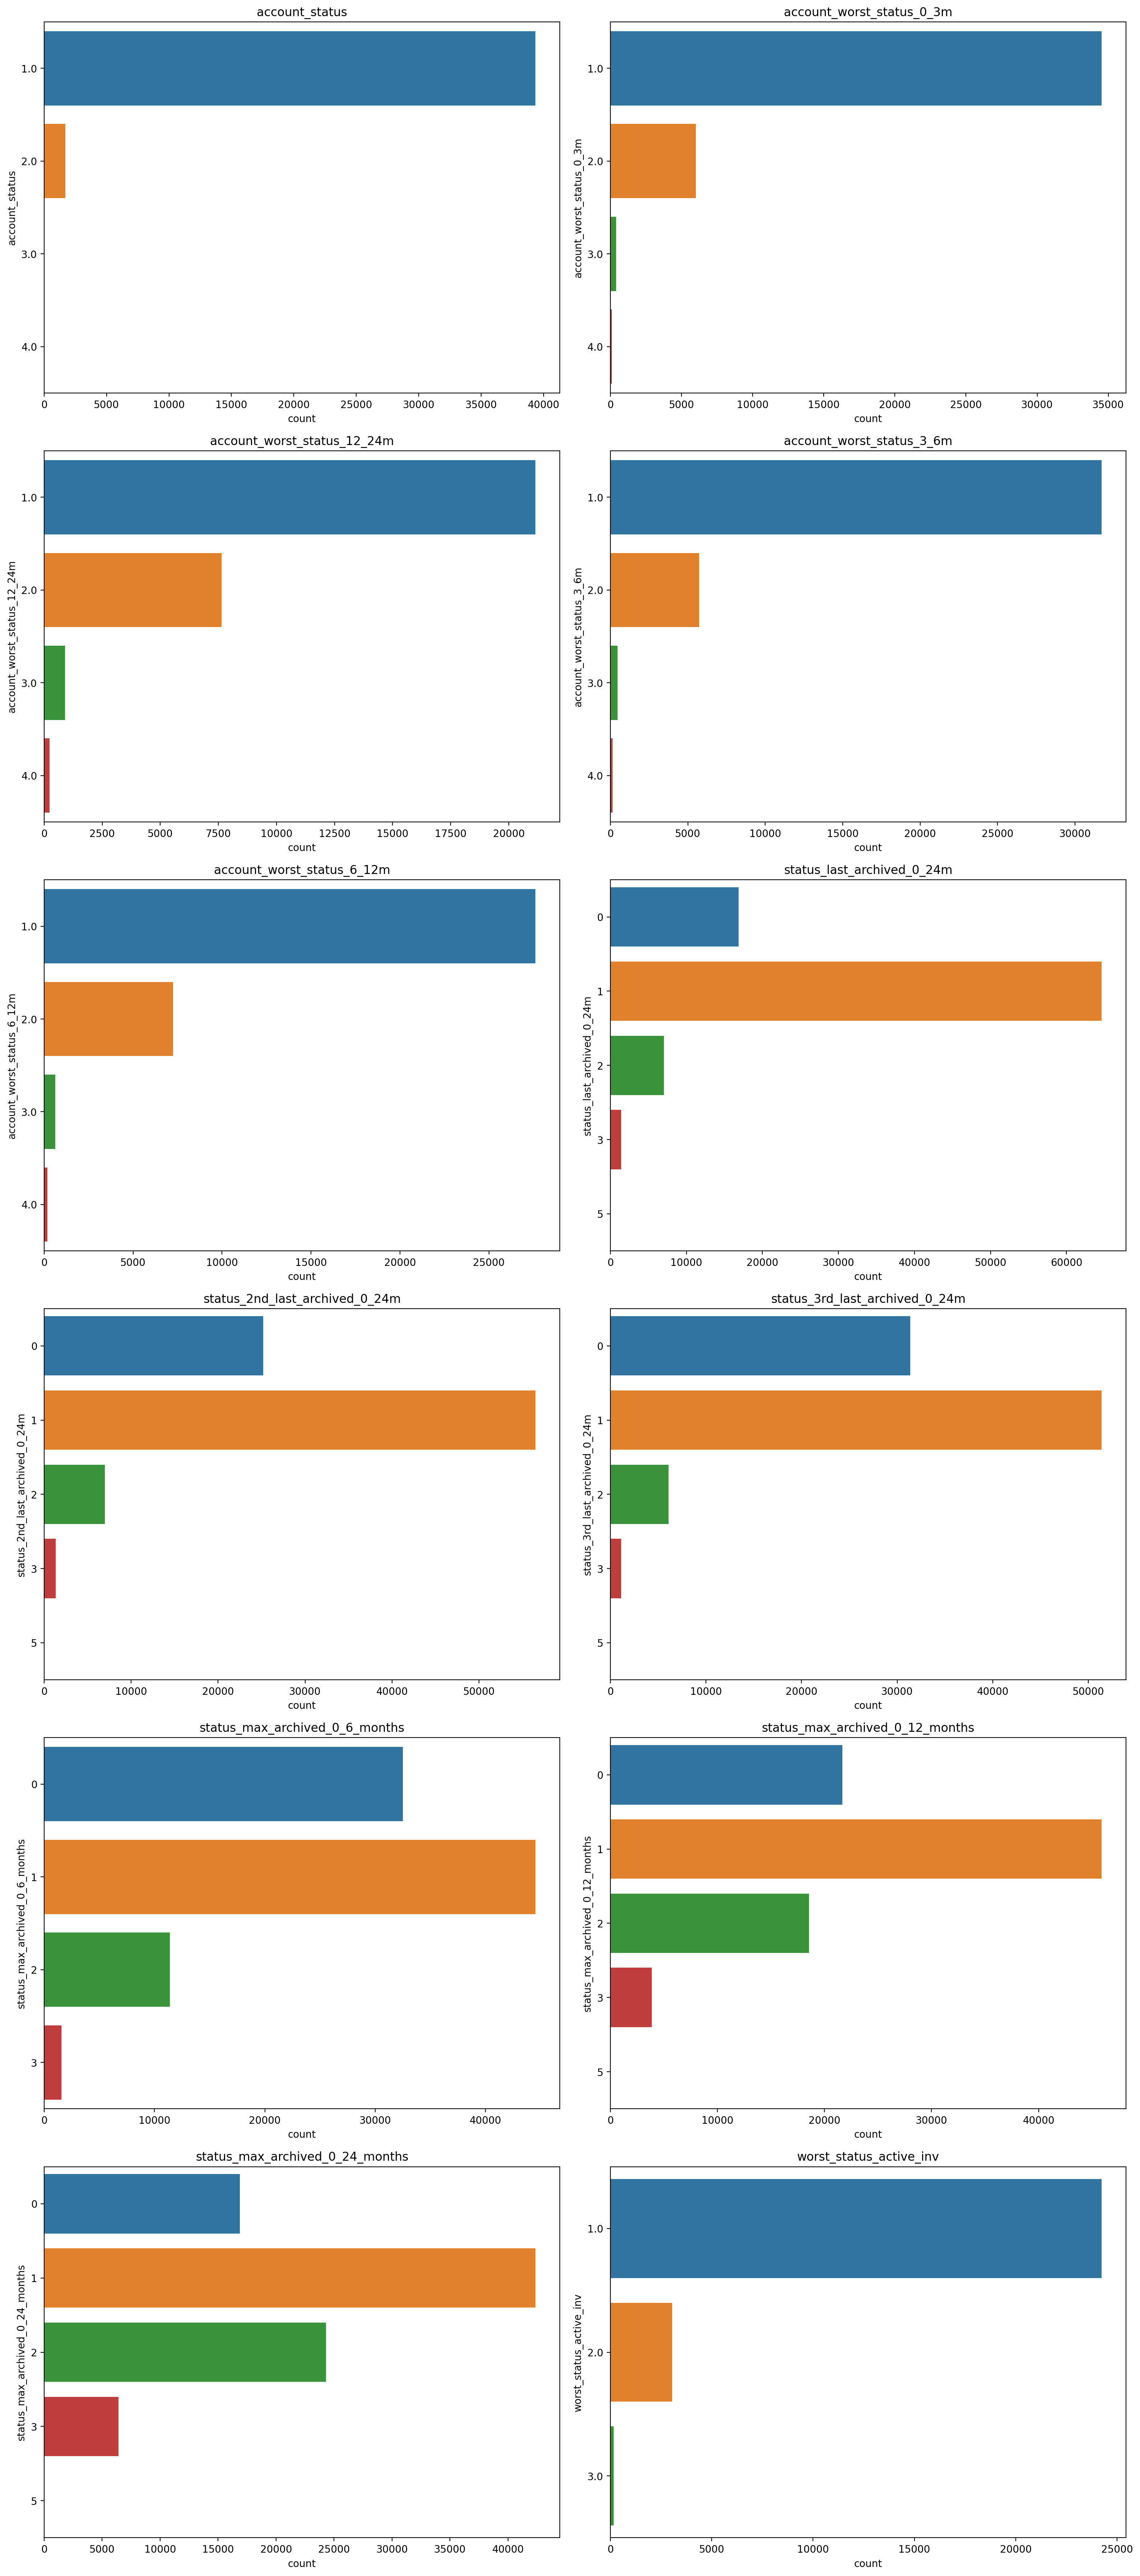

In [59]:
plot_count(df, cat_features)

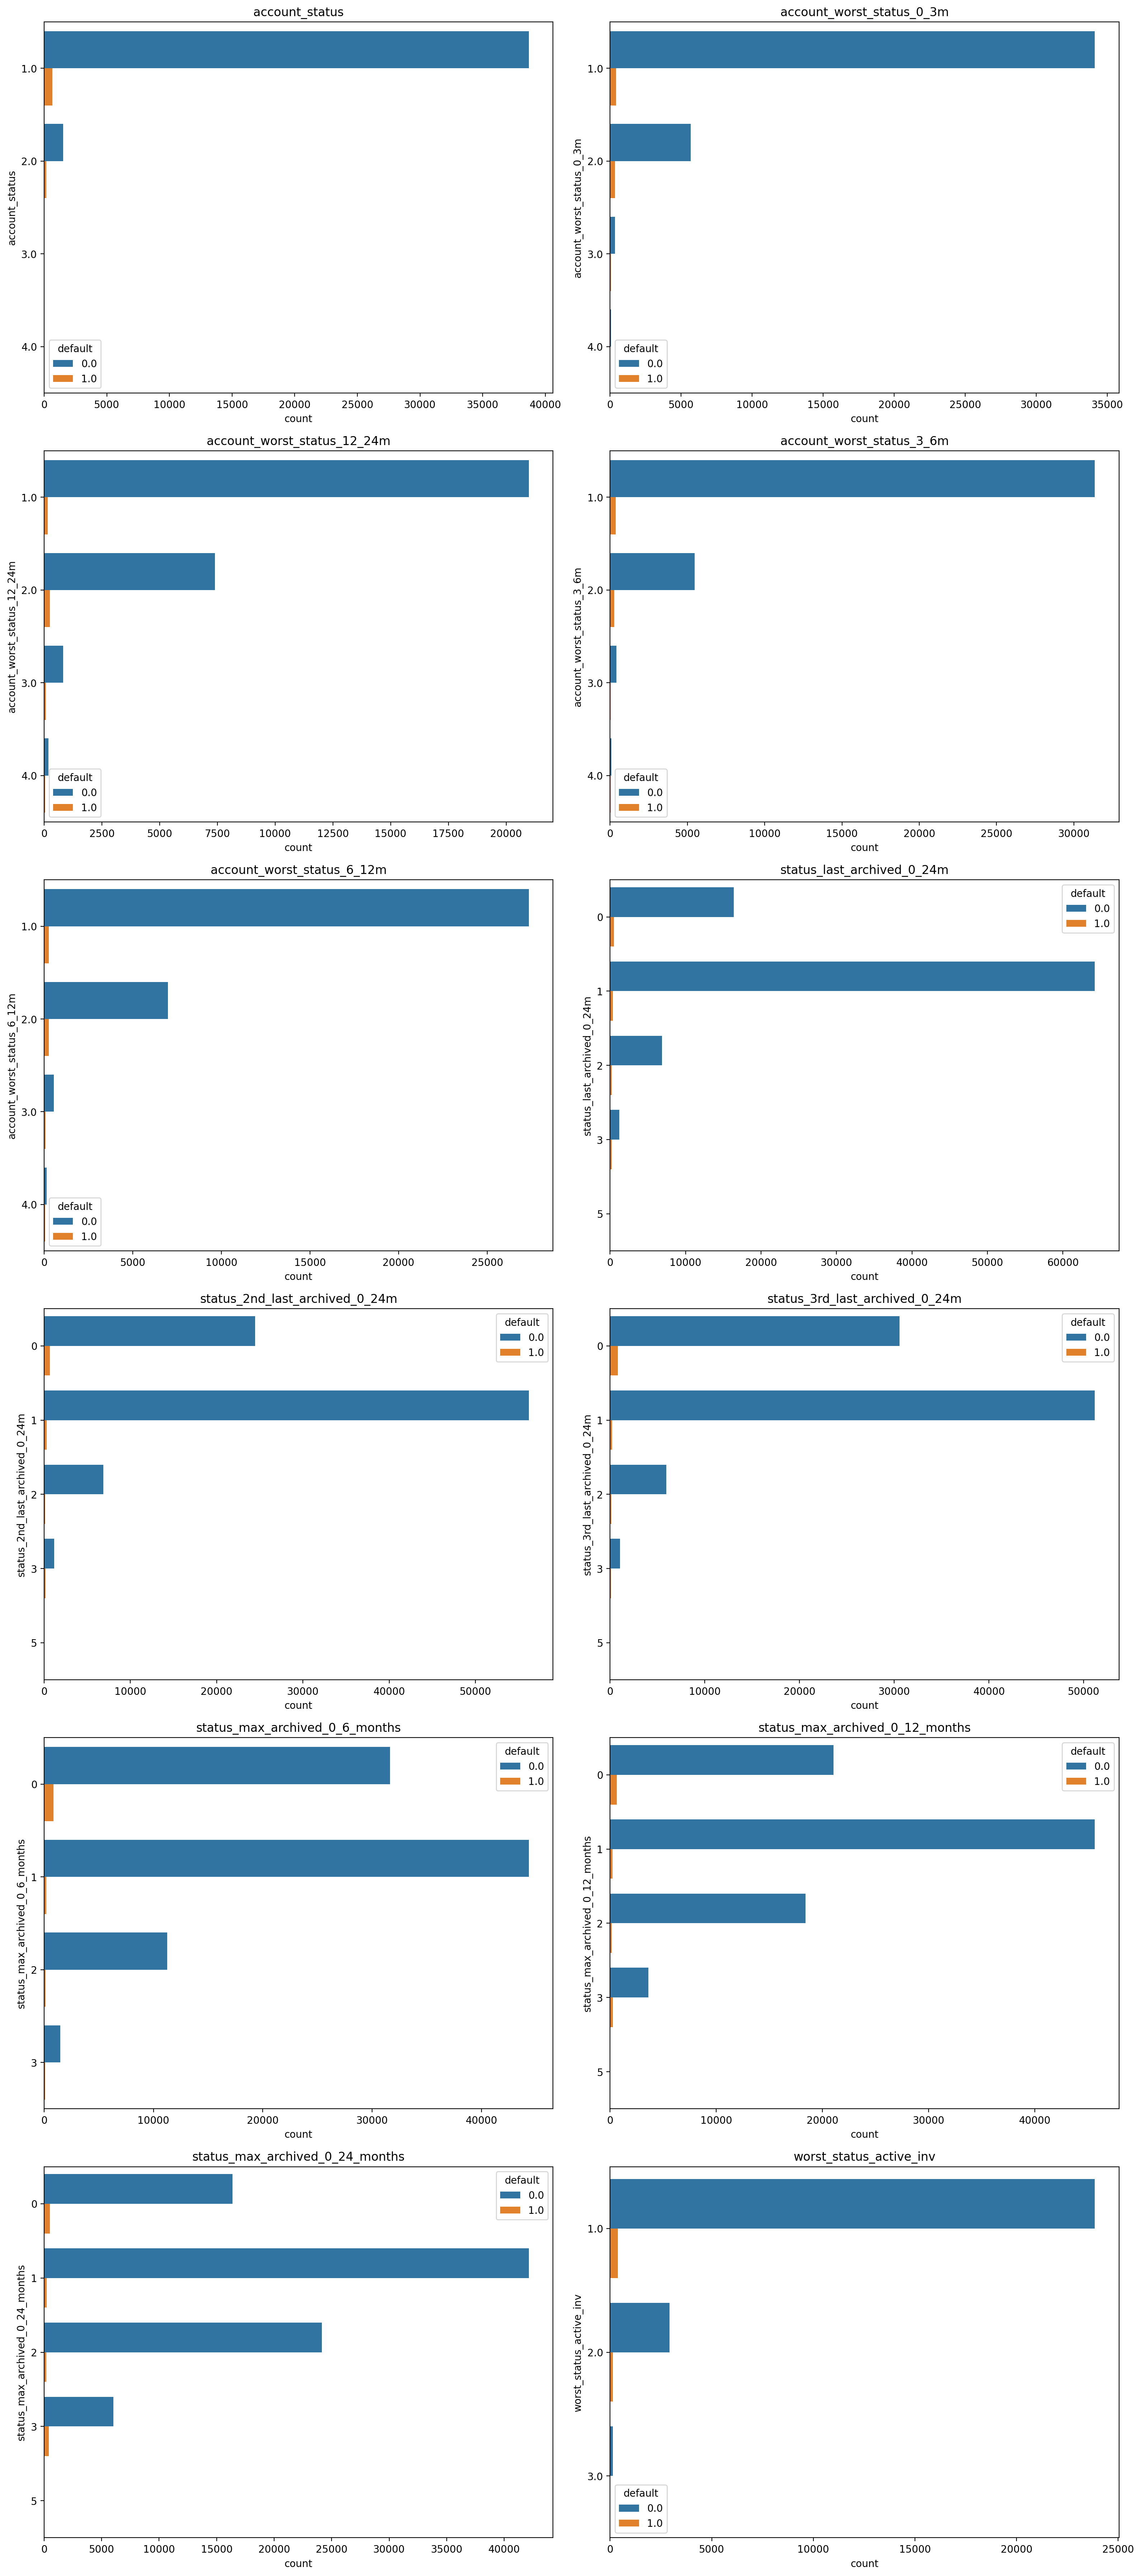

In [60]:
plot_count(df, cat_features, hue=target)

##### Boolean Features

In [46]:
display_summary_statistics(df, bool_features, target=target)

##########STATISTICS##########


,has_paid
count,89976
unique,2
top,True
freq,76570


##########TARGET STATS##########


default,0.0,1.0
has_paid,,
False,0.976578,0.023422
True,0.987280,0.012720



##########MISSING RATE##########

has_paid    0.0
dtype: float64


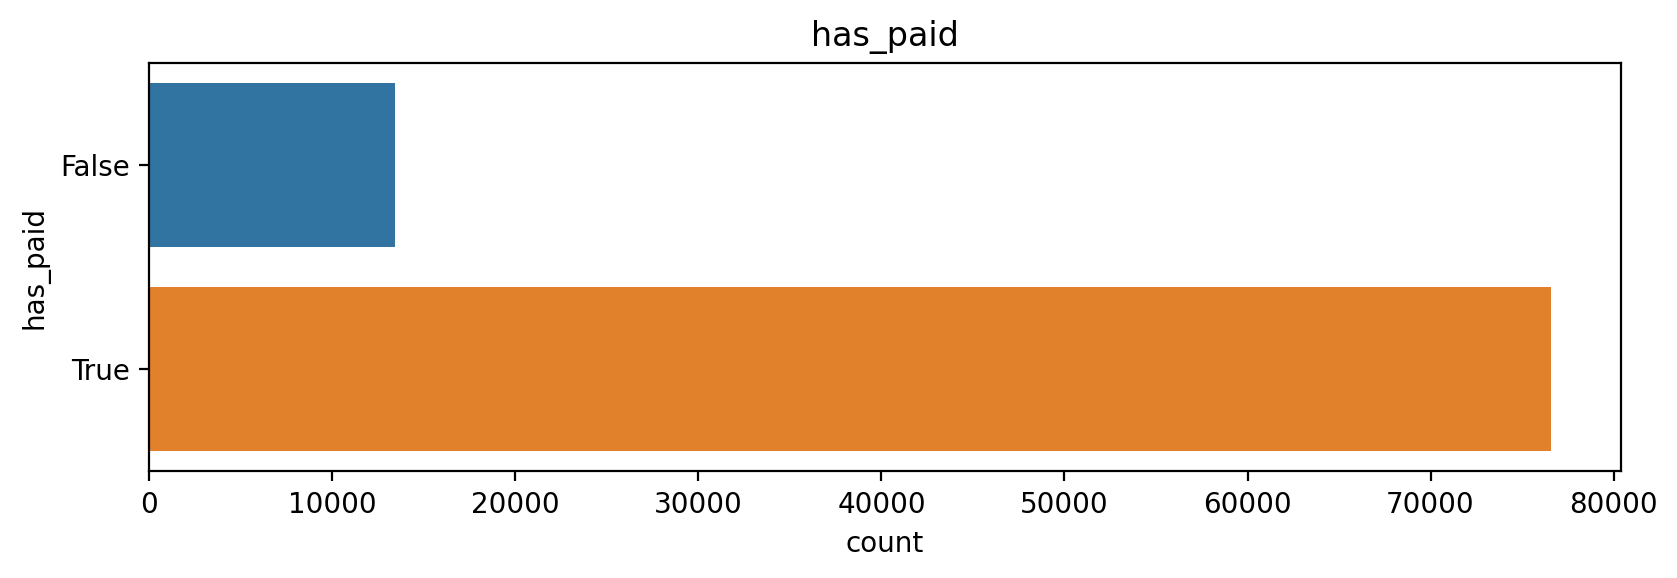

In [61]:
plot_count(df, bool_features)

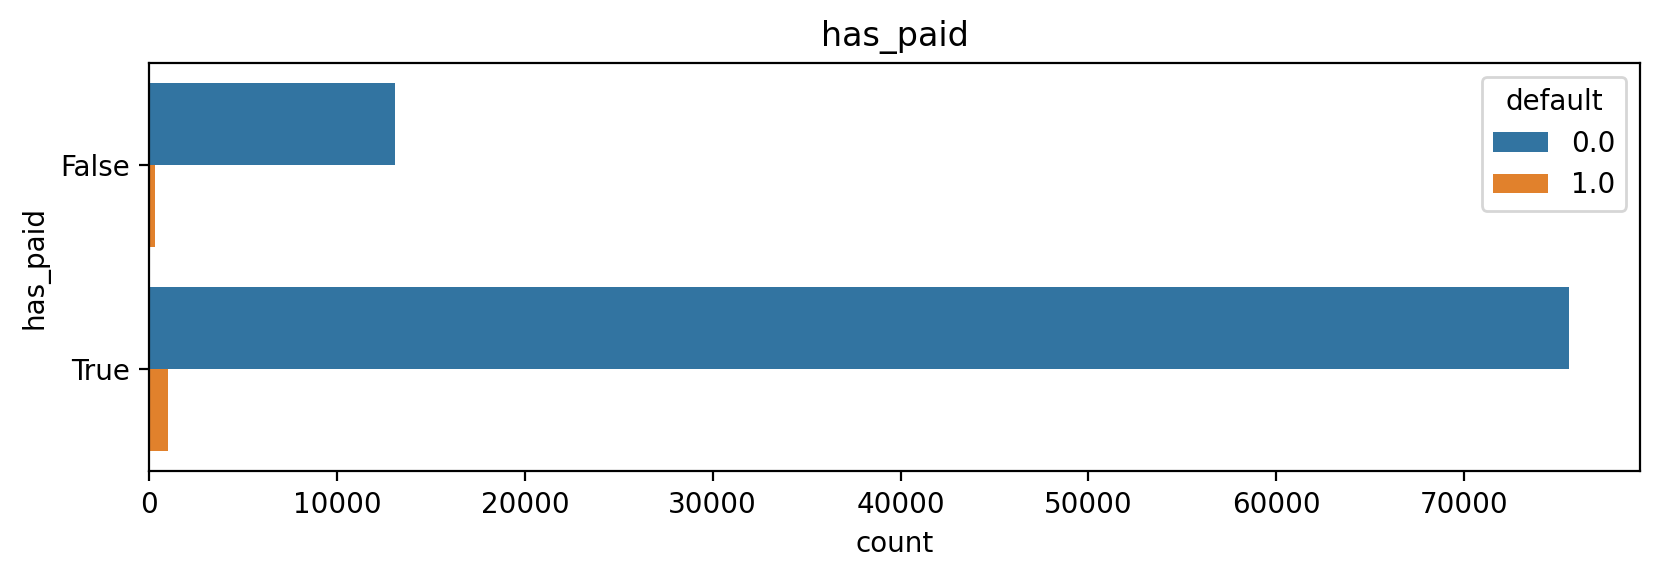

In [62]:
plot_count(df, bool_features, hue=target)

##### String Features

`merchant_category` is a much more granular view of `merchant_group`, since let's consider only `merchant_group` for now

In [53]:
df[string_features].describe()

,merchant_category,merchant_group,name_in_email
count,89976,89976,89976
unique,57,12,8
top,Diversified entertainment,Entertainment,F+L
freq,34781,43940,36358


In [55]:
string_features.remove("merchant_category")

In [56]:
display_summary_statistics(df, string_features, target)

##########STATISTICS##########


,merchant_group,name_in_email
count,89976,89976
unique,12,8
top,Entertainment,F+L
freq,43940,36358


##########TARGET STATS##########


default,0.0,1.0
merchant_group,,
Automotive Products,0.979953,0.020047
Children Products,0.987430,0.012570
Clothing & Shoes,0.977317,0.022683
Electronics,0.976701,0.023299
Entertainment,0.992581,0.007419
Erotic Materials,0.961194,0.038806
Food & Beverage,0.909091,0.090909
Health & Beauty,0.984216,0.015784
Home & Garden,0.981493,0.018507


default,0.0,1.0
name_in_email,,
F,0.987664,0.012336
F+L,0.987513,0.012487
F1+L,0.986293,0.013707
Initials,0.958333,0.041667
L,0.976431,0.023569
L1+F,0.987858,0.012142
Nick,0.980656,0.019344
no_match,0.981052,0.018948



##########MISSING RATE##########

merchant_group    0.0
name_in_email     0.0
dtype: float64


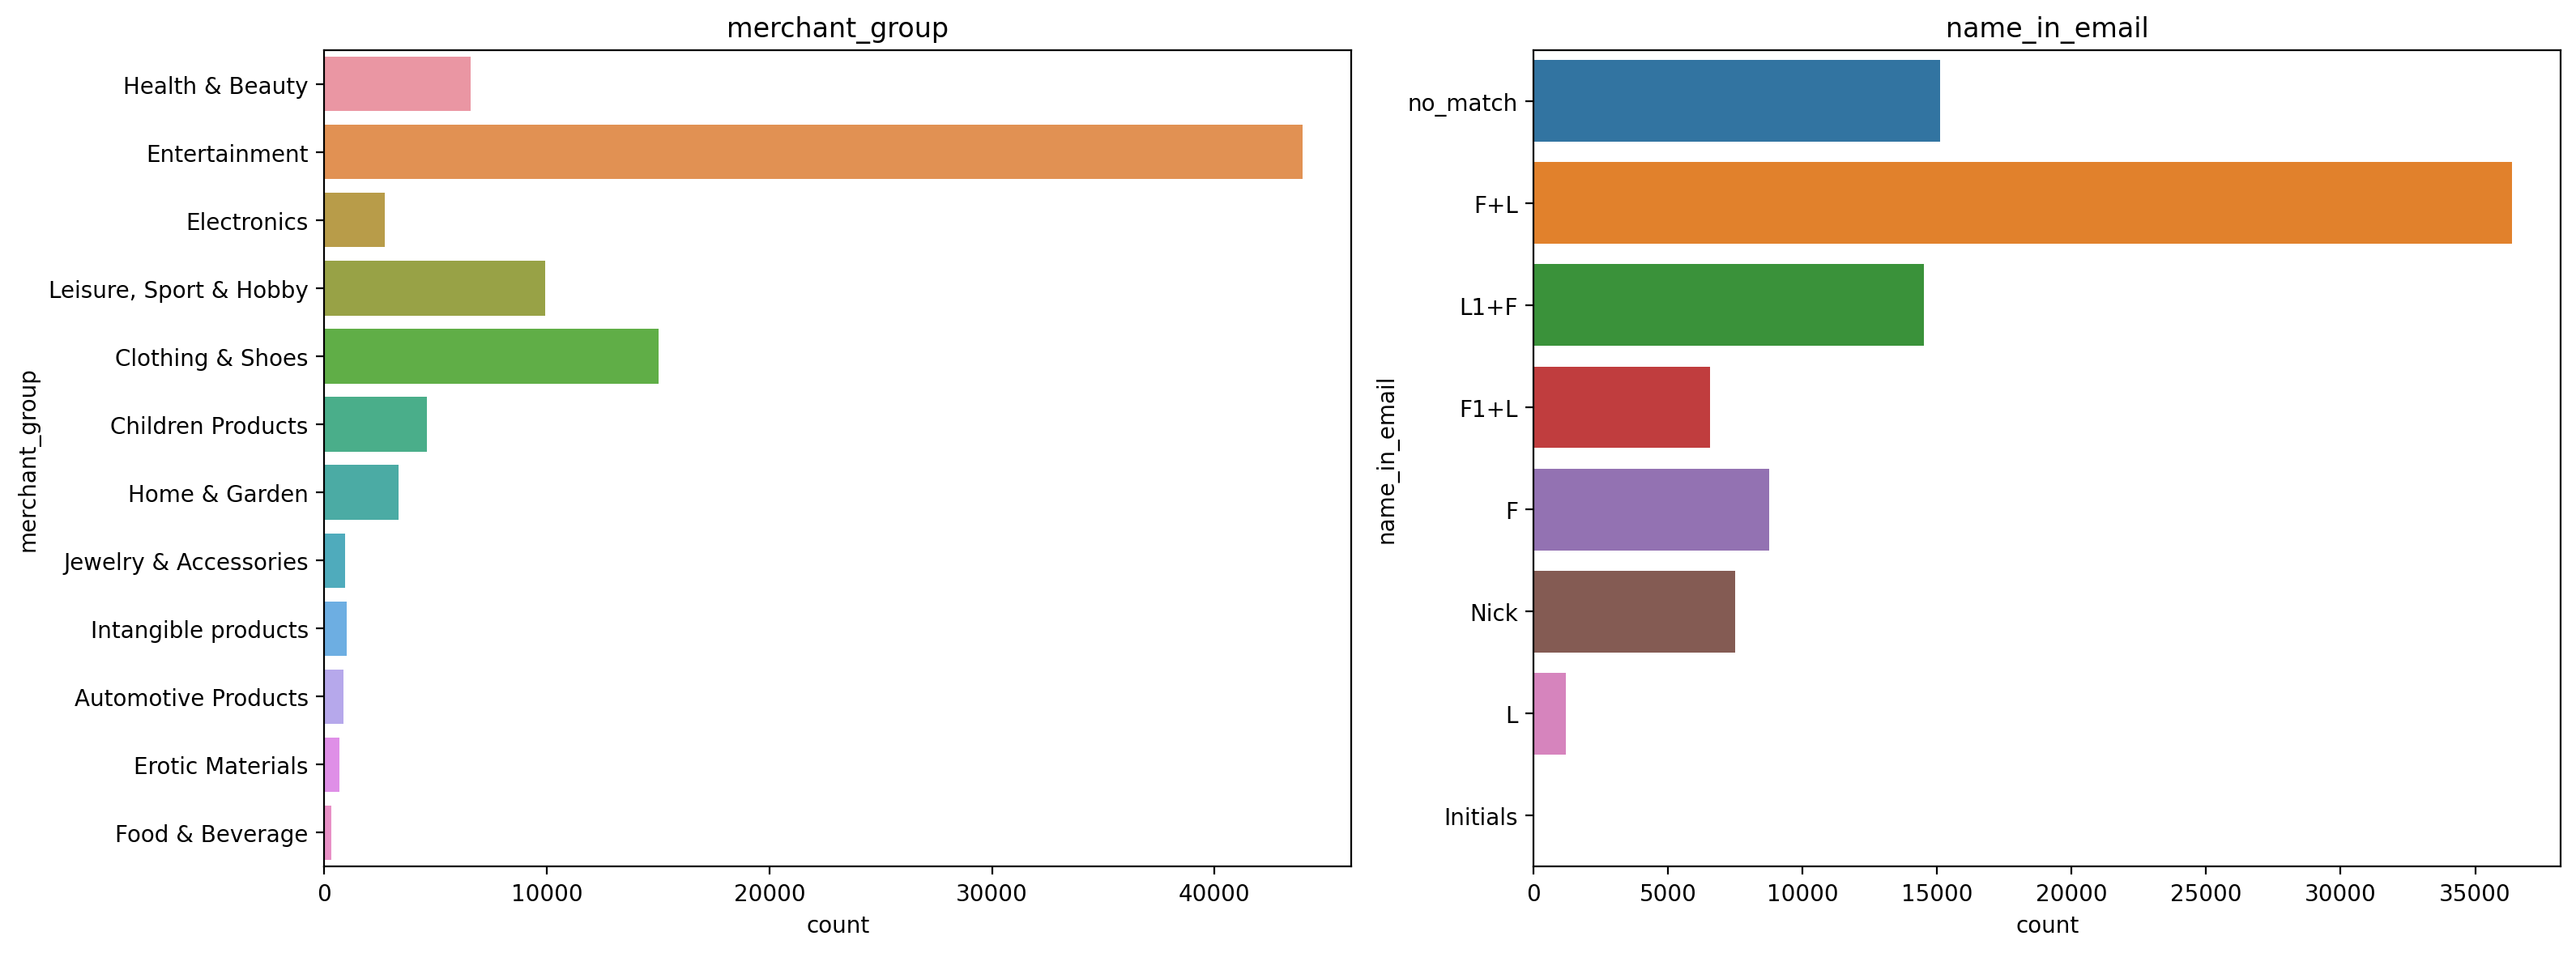

In [63]:
plot_count(df, string_features)

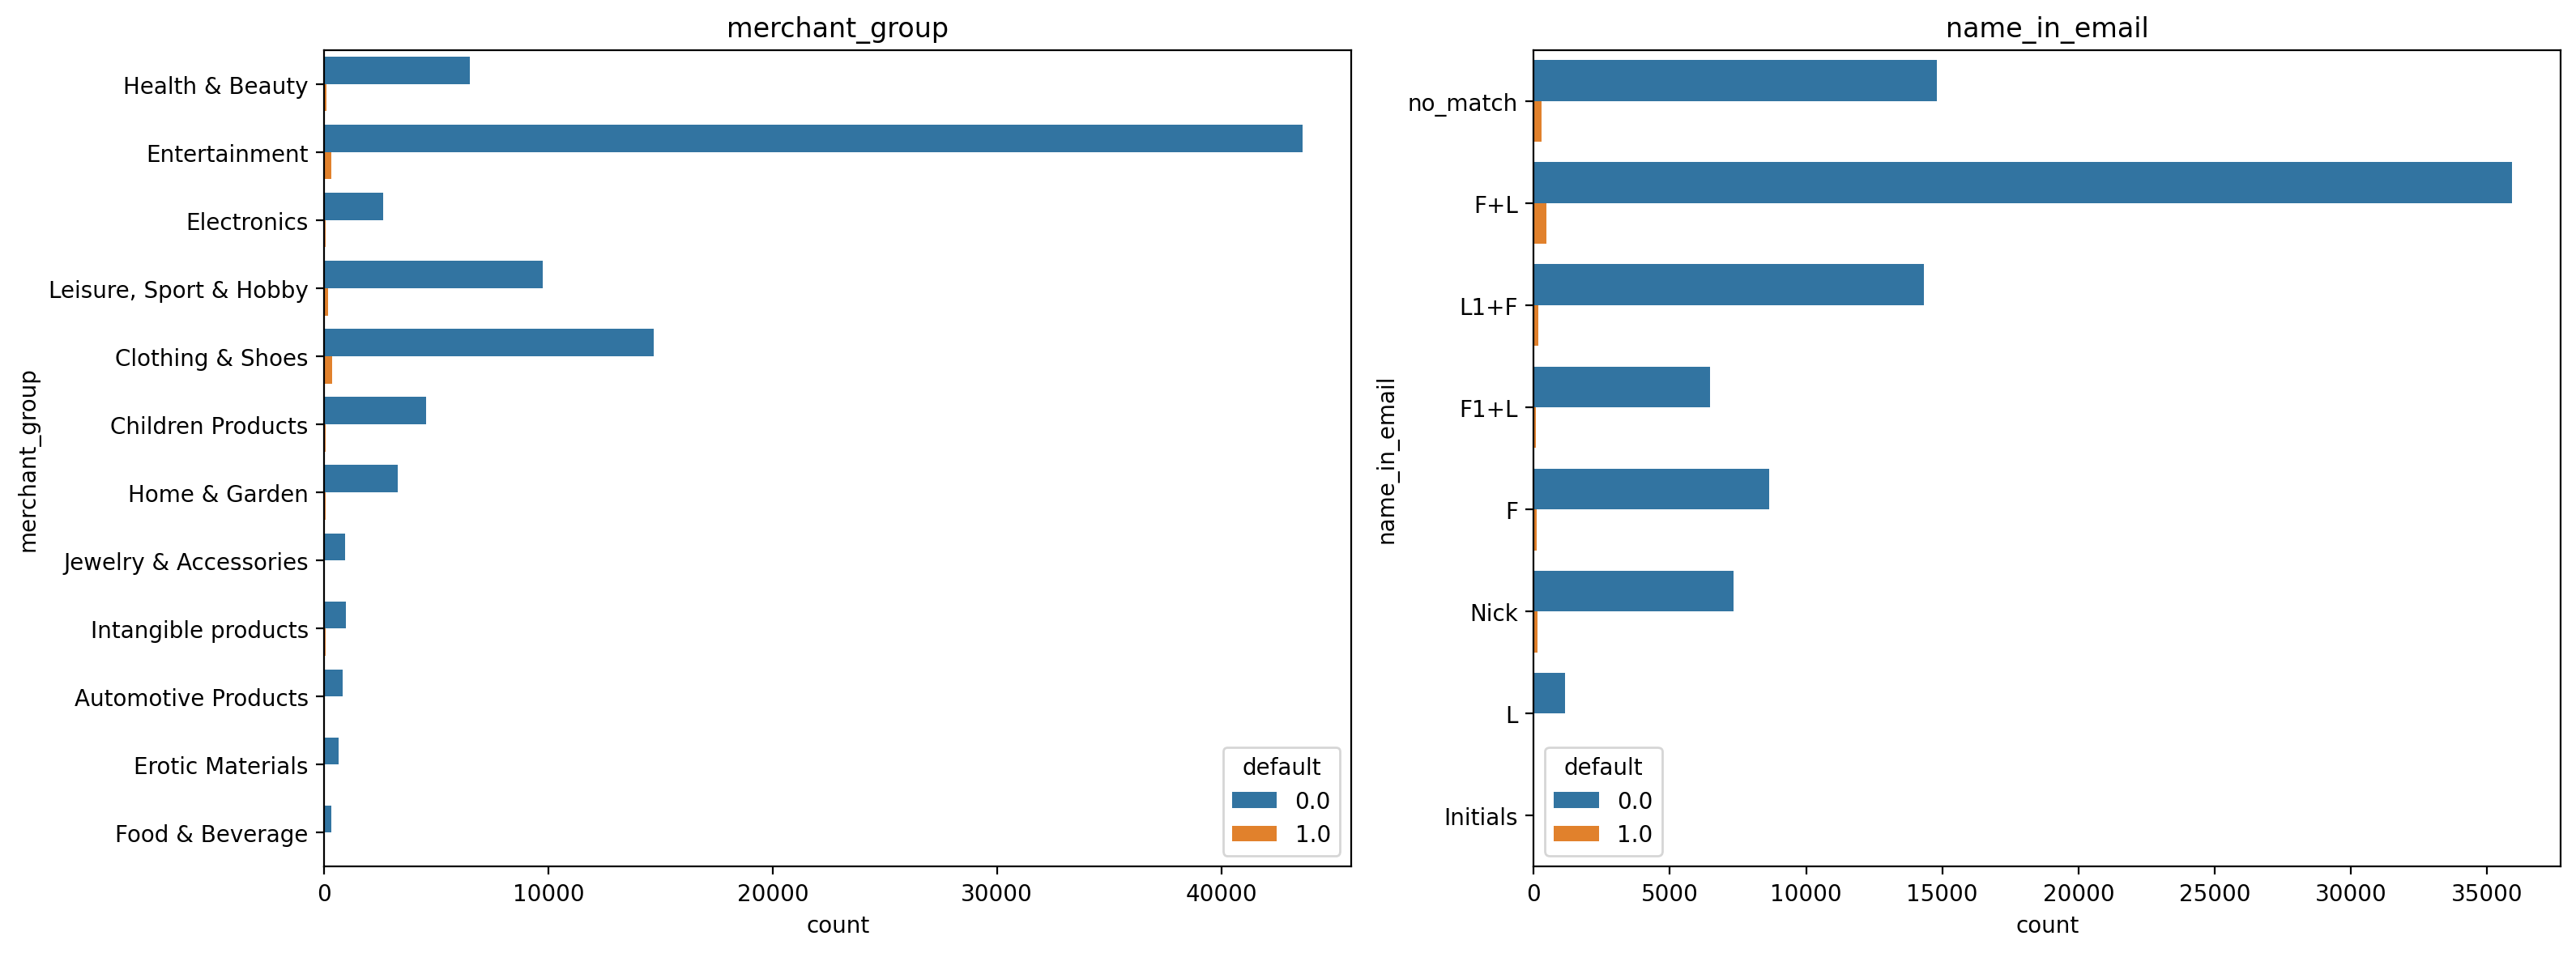

In [64]:
plot_count(df, string_features, target)

##### Numeric Features